In [2]:
#imports
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

import matplotlib.pyplot as plt

In [4]:
#load data
df_train = pd.read_csv('nlp-getting-started/train.csv')
df_test = pd.read_csv('nlp-getting-started/test.csv')

In [8]:
#Explore
print(df_train.info())
print(df_train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


target
0    14.704744
1    15.167533
Name: text, dtype: float64


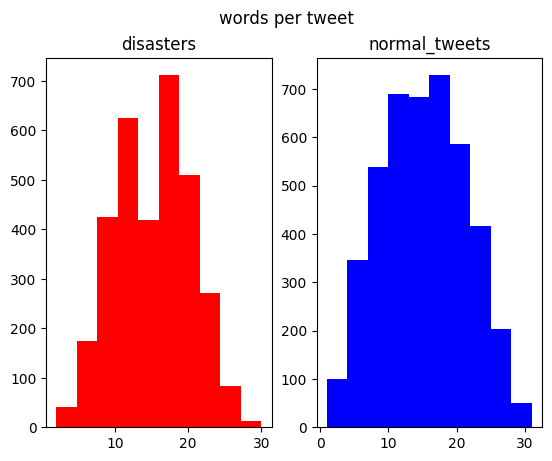

In [7]:
#average words
print(df_train["text"].apply(lambda x: len(str(x).split())).groupby(df_train["target"]).mean())
df_train["word_count"] = df_train["text"].apply(lambda x: len(str(x).split()))

disasters = df_train[df_train["target"]==1]
notDisasters = df_train[df_train["target"]==0]

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(disasters["word_count"], color='red')
ax1.set_title("disasters")
ax2.hist(notDisasters['word_count'], color='blue')
ax2.set_title("normal_tweets")
fig.suptitle('words per tweet')
plt.show()